In [41]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

Loading image: image_1.png
(1350, 2397, 3)
Processed Image Height: 1350, Width: 2397
1/1 [==============================] - 2s 2s/step
Prediction saved at: prediction.png


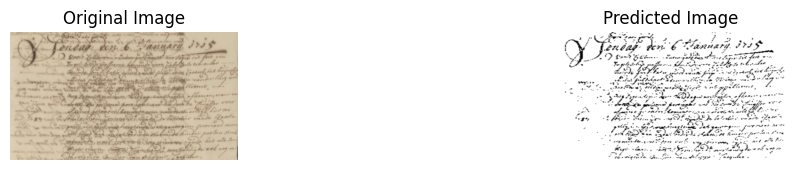

In [43]:
def predict_and_save_image(image_path, model_path, save_path, target_size=(256, 256)):
    # Load and preprocess a single image
    def load_and_preprocess_single_image(image_path, target_size):
        print(f"Loading image: {image_path}")
        img = cv2.imread(image_path)

        if img is None:
            print(f"Error loading image: {image_path}")
            return None, None

        # Get the height and width of the input image
        height, width, _ = img.shape
        print(img.shape)

        # Apply median blur to the input image
        img = cv2.medianBlur(img, 5)

        # Resize the image to the target size
        img = cv2.resize(img, target_size)

        # Normalize pixel values to the range [0, 1]
        img = img.astype('float32') / 255.0

        # Return the processed image, height, and width
        return img, height, width

    # Load and preprocess the input image
    processed_image, img_height, img_width = load_and_preprocess_single_image(image_path, target_size)

    print(f"Processed Image Height: {img_height}, Width: {img_width}")

    # Load the trained model
    model = load_model(model_path)

    # Check if the image is loaded successfully
    if processed_image is not None and processed_image.shape == (256, 256, 3):
        processed_image = cv2.resize(processed_image, (256, 256))

        # Make a prediction
        prediction = model.predict(np.expand_dims(processed_image, axis=0))

        # # Binarize the output of the model
        prediction = (prediction > 0.5).astype(np.uint8) * 255

        # # Resize the prediction back to the original size
        prediction = cv2.resize(prediction[0], (img_width, img_height))

        # Save the resized prediction
        cv2.imwrite(save_path, prediction)
        print(f"Prediction saved at: {save_path}")

        # Display the results using Matplotlib
        plt.figure(figsize=(10, 5))

        # Original Image
        plt.subplot(1, 3, 1)
        plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
        plt.title("Original Image")
        plt.axis("off")


        # Predicted Image
        plt.subplot(1, 3, 3)
        plt.imshow(prediction, cmap='gray')
        plt.title("Predicted Image")
        plt.axis("off")

        plt.show()

# Example usage
image_path = "image_1.png"#add the path of input image
model_path = "unet_binarizer.keras"#PAth to the model provided
save_path = "prediction.png"#add where you want to save image

predict_and_save_image(image_path, model_path, save_path)
